In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [76]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [77]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [78]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,HUNDER18,GTCO,Family Type
50,23,6,60721,177585,1,11,2p1c
284,23,2,249073,39576,0,11,2p0c
285,23,2,119153,126961,0,11,2p0c
289,23,2,52787,128161,0,11,2p0c
290,23,1,149570,804,0,11,1p0c
...,...,...,...,...,...,...,...
88973,15,4,36445,96000,1,3,2p1c
88974,15,2,68296,173540,0,3,2p0c
88975,15,6,44578,211102,2,3,2p2c
88976,15,5,41320,90415,2,3,2p2c


In [79]:
sample_df = df.sample(n=20000, weights=df['HSUP_WGT'])
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,HUNDER18,GTCO,Family Type
47994,12,4,397952,579363,0,57,2p0c
73931,4,4,203093,130460,1,19,2p1c
6557,9,2,311380,100017,0,9,2p0c
70781,8,3,603104,101100,0,69,2p0c
23296,55,1,449539,9661,0,101,1p0c
...,...,...,...,...,...,...,...
86379,6,2,377908,85000,0,95,2p0c
33186,11,3,19704,357900,1,1,2p1c
33805,11,1,41652,22520,0,1,1p0c
86042,6,2,196500,148536,0,83,2p0c


In [80]:
# 'calculate' time
sample_df['Free Time'] = 8

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code
47994,12,4,397952,579363,0,057,2p0c,8,12057
73931,04,4,203093,130460,1,019,2p1c,8,04019
6557,09,2,311380,100017,0,009,2p0c,8,09009
70781,08,3,603104,101100,0,069,2p0c,8,08069
23296,55,1,449539,9661,0,101,1p0c,8,55101
...,...,...,...,...,...,...,...,...,...
86379,06,2,377908,85000,0,095,2p0c,8,06095
33186,11,3,19704,357900,1,001,2p1c,8,11001
33805,11,1,41652,22520,0,001,1p0c,8,11001
86042,06,2,196500,148536,0,083,2p0c,8,06083


In [81]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density
0,12,4,397952,579363,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406
1,12,4,210962,55000,1,057,2p1c,8,12057,Hillsborough County,Florida,1478194,1051,1406
2,12,1,392393,87313,0,057,1p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406
3,12,2,201759,186151,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406
4,12,3,218408,74900,1,057,2p1c,8,12057,Hillsborough County,Florida,1478194,1051,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,13,2,471590,55125,0,015,2p0c,8,13015,Bartow County,Georgia,110843,460,241
19586,13,2,383298,37681,0,015,2p0c,8,13015,Bartow County,Georgia,110843,460,241
19587,13,5,215847,100026,3,015,2p3c,8,13015,Bartow County,Georgia,110843,460,241
19588,13,4,313798,136321,1,015,2p1c,8,13015,Bartow County,Georgia,110843,460,241


In [82]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,12,4,397952,579363,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072
1,12,2,201759,186151,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072
2,12,2,630793,242008,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072
3,12,2,378328,81603,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072
4,12,3,229181,53703,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,13,2,383298,37681,0,015,2p0c,8,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804
19585,13,1,297266,50046,0,015,1p0c,8,13015,Bartow County,Georgia,110843,460,241,1p0c,"$48,744",48744
19586,13,5,215847,100026,3,015,2p3c,8,13015,Bartow County,Georgia,110843,460,241,2p3c,"$112,116",112116
19587,13,4,313798,136321,1,015,2p1c,8,13015,Bartow County,Georgia,110843,460,241,2p1c,"$82,056",82056


In [83]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [84]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [85]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [86]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,GESTFIPS,H_NUMPER,HSUP_WGT,Income,HUNDER18,GTCO,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,12,4,397952,579363,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072,1781.0
1,1,12,2,201759,186151,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072,1833.0
2,2,12,2,630793,242008,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072,1815.0
3,3,12,2,378328,81603,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072,1954.0
4,4,12,3,229181,53703,0,057,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,1406,2p0c,"$66,072",66072,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,19584,13,2,383298,37681,0,015,2p0c,8,13015,Bartow County,Georgia,110843,460,241,2p0c,"$63,804",63804,2185.0
19585,19585,13,1,297266,50046,0,015,1p0c,8,13015,Bartow County,Georgia,110843,460,241,1p0c,"$48,744",48744,2135.0
19586,19586,13,5,215847,100026,3,015,2p3c,8,13015,Bartow County,Georgia,110843,460,241,2p3c,"$112,116",112116,2010.0
19587,19587,13,4,313798,136321,1,015,2p1c,8,13015,Bartow County,Georgia,110843,460,241,2p1c,"$82,056",82056,2204.0


In [87]:
# clean up
sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO']).rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,HUNDER18,Family Type,Free Time,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,4,397952,579363,0,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,542.895254,2p0c,"$66,072",66072,165.460314
1,1,2,201759,186151,0,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,542.895254,2p0c,"$66,072",66072,170.291272
2,2,2,630793,242008,0,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,542.895254,2p0c,"$66,072",66072,168.619018
3,3,2,378328,81603,0,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,542.895254,2p0c,"$66,072",66072,181.532540
4,4,3,229181,53703,0,2p0c,8,12057,Hillsborough County,Florida,1478194,1051,542.895254,2p0c,"$66,072",66072,181.532540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19584,19584,2,383298,37681,0,2p0c,8,13015,Bartow County,Georgia,110843,460,93.056726,2p0c,"$63,804",63804,202.993142
19585,19585,1,297266,50046,0,1p0c,8,13015,Bartow County,Georgia,110843,460,93.056726,1p0c,"$48,744",48744,198.347990
19586,19586,5,215847,100026,3,2p3c,8,13015,Bartow County,Georgia,110843,460,93.056726,2p3c,"$112,116",112116,186.735110
19587,19587,4,313798,136321,1,2p1c,8,13015,Bartow County,Georgia,110843,460,93.056726,2p1c,"$82,056",82056,204.758300


In [88]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index

(array([ 346.,  541.,  531.,  644.,  755.,  908., 1015., 1153., 1305.,
        1301., 1274., 1265., 1229., 1210., 1228., 1285., 1244., 1183.,
         761.,  411.]),
 array([0.00561118, 0.05530811, 0.10500505, 0.15470198, 0.20439891,
        0.25409584, 0.30379278, 0.35348971, 0.40318664, 0.45288357,
        0.50258051, 0.55227744, 0.60197437, 0.6516713 , 0.70136824,
        0.75106517, 0.8007621 , 0.85045903, 0.90015597, 0.9498529 ,
        0.99954983]),
 <BarContainer object of 20 artists>)

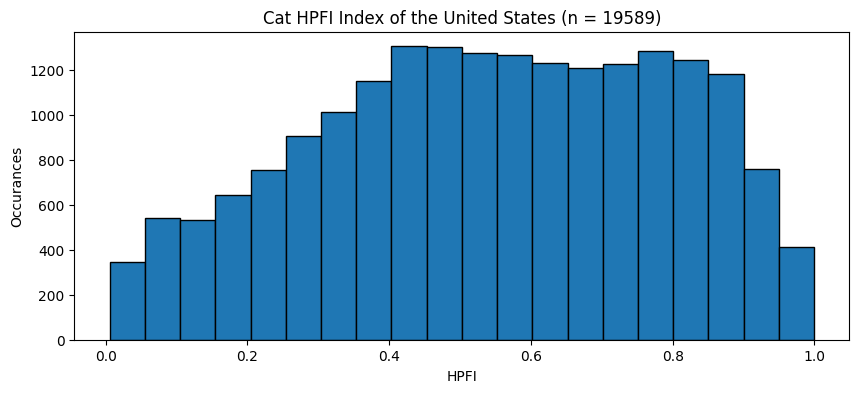

In [89]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living     = row['Cost of Living']
    floor_area          = row['Floor Area']

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, 0)
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, 0)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")
